In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from collections import defaultdict
from scipy.spatial.distance import pdist, cdist

## PCA

In [2]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','num']

data = np.zeros((1, len(columns)))

for file in ['../UCI_data/processed.va.csv', '../UCI_data/processed.switzerland.csv', 
             '../UCI_data/processed.cleveland.csv', '../UCI_data/processed.hungarian.csv']:
        data = np.vstack((data, np.genfromtxt(file, delimiter=',')))

data = data[1:]

df = pd.DataFrame(data=data, columns=columns, index=None)

df.to_csv('df.csv', sep='\t', index=False)

In [3]:
X = df[(~df.isna()).all(axis=1)].copy()

y = X['num']

X.drop(columns='num', inplace=True)

##### Q1. How many principal components are needed to describe at least 90% of the variance in the data?

In [4]:
pca = PCA(n_components=10)

X_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([7.48637160e-01, 1.49403125e-01, 8.39167182e-02, 1.59171097e-02,
       9.91776469e-04, 3.24156389e-04, 2.45342591e-04, 2.16792267e-04,
       1.73318576e-04, 5.78923152e-05])

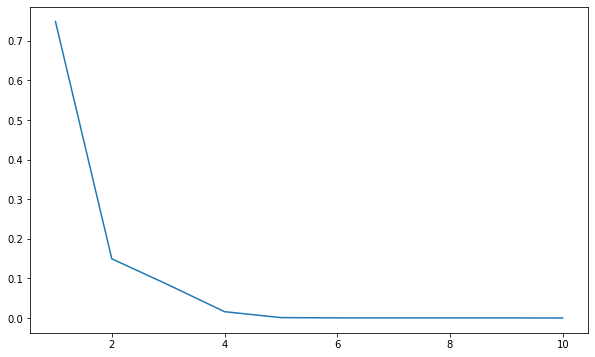

In [5]:
plt.figure(figsize=(10,6))

plt.plot(range(1, 11), pca.explained_variance_ratio_)

plt.show()

##### A1. 2 or 3 Principal components are enough to describe 30% of the variance in the data

##### Q2. Show a 2D PCA plot of all patients.

In [6]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

pca_data = pd.DataFrame(data=X_pca, columns=['component 1', 'component 2'])

pca_df = pd.concat([pca_data, y.reset_index(drop=True)], axis=1)

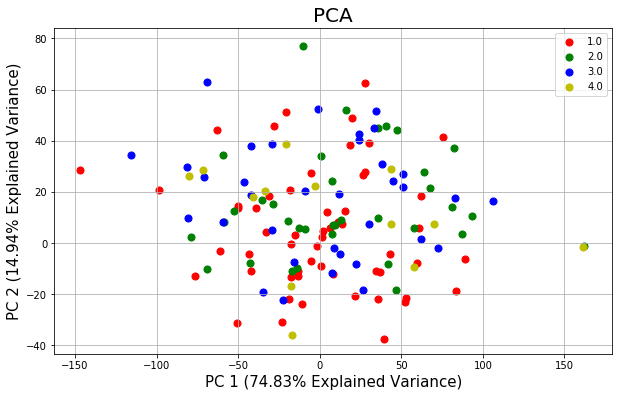

In [7]:
fig = plt.figure(figsize = (10,6))

ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('PC 1 (74.83% Explained Variance)', fontsize = 15)
ax.set_ylabel('PC 2 (14.94% Explained Variance)', fontsize = 15)
ax.set_title('PCA', fontsize = 20)

y_vals = [1.0, 2.0, 3.0, 4.0]
colors = ['r', 'g', 'b', 'y']

for num, color in zip(y_vals, colors):
    class_index = pca_df['num'] == num
    ax.scatter(pca_df.loc[class_index, 'component 1'],
               pca_df.loc[class_index, 'component 2'],
               c = color,
               s = 50
              )

ax.legend(y_vals)
ax.grid()

plt.show()

## Clustering

##### Q1. Apply hierarchical clustering to the UCI heart dataset using,
- Euclidean distance
- Manhattan distance
- Mahalanobis distance
- Spearman rank correlation distance

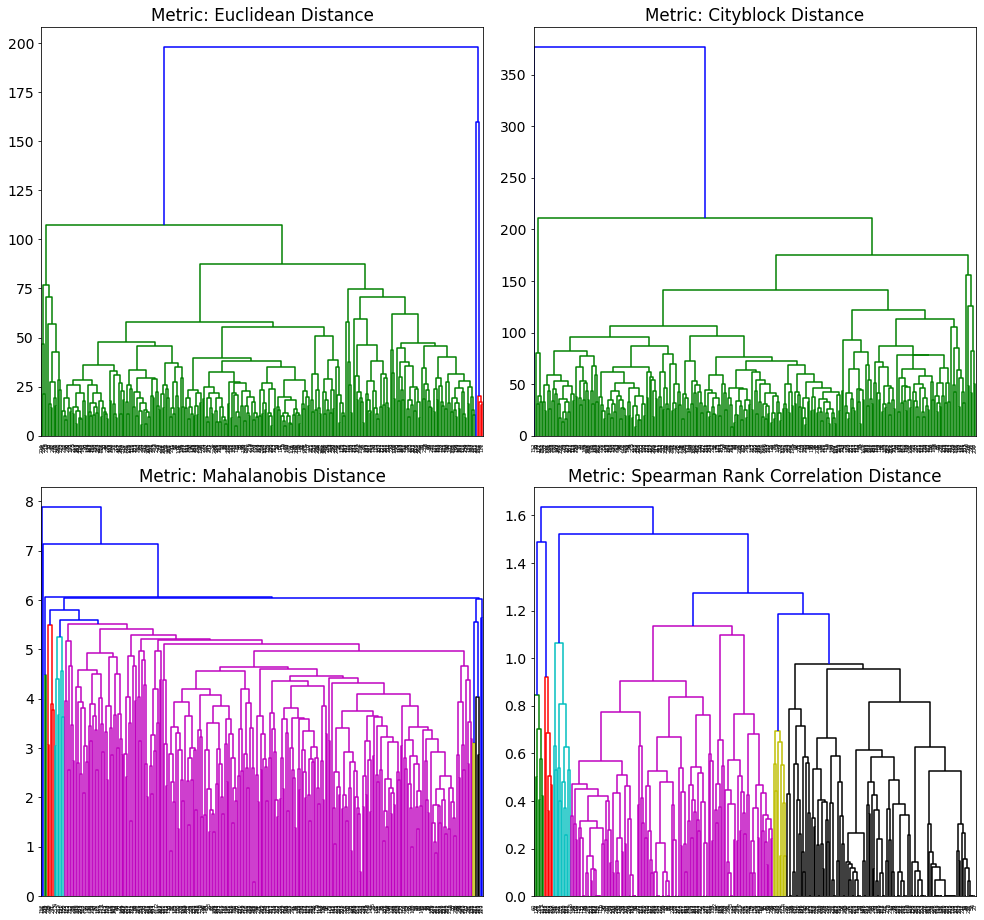

In [8]:
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 13))

x = 0
y = 0

for metric in ['euclidean', 'cityblock', 'mahalanobis', 'spearman_rank_corr']:
    if y == 2:
        y = 0
        x += 1

    if metric == 'spearman_rank_corr':
        dendrogram(linkage(X.transpose().corr('spearman'), method='average'), ax=axes[x, y])
        axes[x, y].set_title('Metric: Spearman Rank Correlation Distance')
    else:
        dendrogram(linkage(X, metric=metric, method='average'), ax=axes[x, y])
        axes[x, y].set_title(f'Metric: {metric.title()} Distance')

    y += 1

fig.tight_layout()
plt.show()

##### Q2. Try different linkage algorithms.
- Single
- Complete
- Average
- Ward

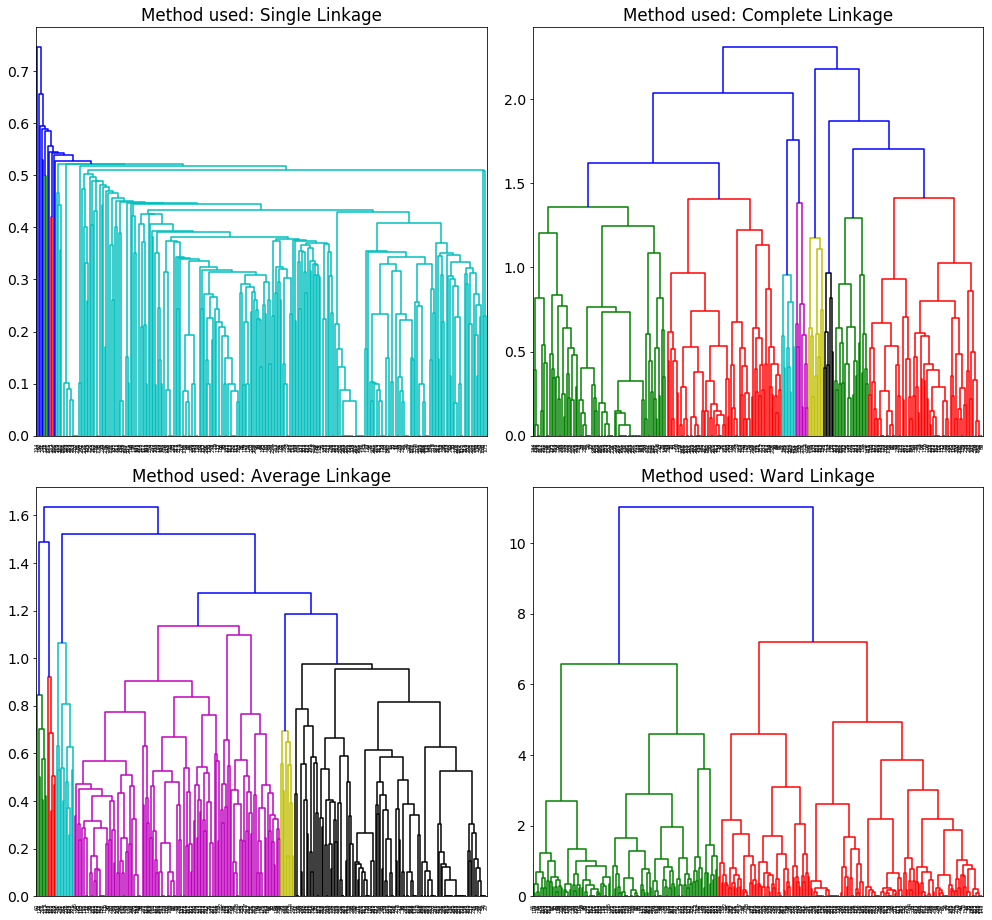

In [9]:
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 13))

x = 0
y = 0

for linkage_method in ['single', 'complete', 'average', 'ward']:
    if y == 2:
        y = 0
        x += 1

    dendrogram(linkage(X.transpose().corr('spearman'), method=linkage_method), ax=axes[x, y])
    axes[x, y].set_title(f'Method used: {linkage_method.title()} Linkage')

    y += 1

fig.tight_layout()
plt.show()